In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
plt.style.use('seaborn')

In [27]:
data = pd.read_csv('../data/values_from_the_instrument.csv')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

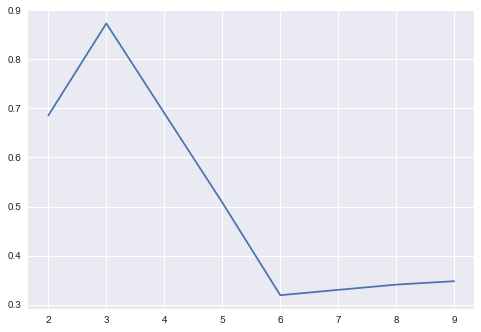

In [28]:
def get_sil(num_clust, df):
    k_model = KMeans(n_clusters=num_clust, random_state=42)
    k_model.fit(df)
    sil_score = metrics.silhouette_score(df, k_model.predict(df))
    return sil_score
silhouette_scores = [get_sil(i, data) for i in range(2,10)]
sns.lineplot([i for i in range(2,10)], silhouette_scores)

c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

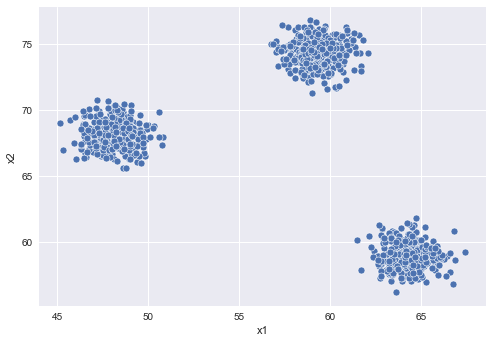

In [29]:
sns.scatterplot(data['x1'], data['x2'])

In [30]:
pred =[1, 0, 2, 1, 2]
y_true = [1, 2, 2, 1, 0]
print(metrics.rand_score(y_true, pred))
print(metrics.homogeneity_completeness_v_measure(y_true, pred))

0.8
(0.737175493807016, 0.737175493807016, 0.737175493807016)


<AxesSubplot:xlabel='x1', ylabel='x2'>

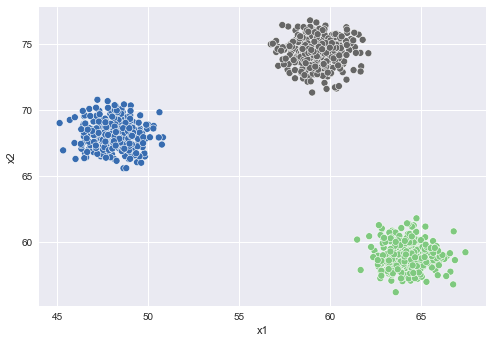

In [45]:
from sklearn.cluster import AgglomerativeClustering
ag_clust = AgglomerativeClustering(3, linkage='ward')
ag_clust.fit(data)
sns.scatterplot(x=data['x1'], y=data['x2'], c=ag_clust.labels_, cmap='Accent')

In [50]:
ag_clust

TypeError: 'NoneType' object is not callable